In [1]:
# Neural networks
# Perceptron is simplest neural network possible
# Consists of one more input and sent to processor to create an output
# Receive input, weight input, sum inputs, generate output
# Output is generated by passing sum into a activation function to determine if to fire output
# Common to put in bias as well to shift to create new boundaries

In [2]:
# Training perceptrons:
# 1. Provide perceptron with inputs for which there is known answer
# 2. Ask the perceptron to guess an answer
# 3. Compute the error
# 4. Adjust all the wieghts according to the error
# 5. Return to step 1 and repeat
# layer a bunch of perceptrons to create a neural net
# input layer -> hidden layer -> output layer
# MSFT vision recognition uses 152 layers

In [5]:
%%capture
# update mnist section
"""
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)
 
import tensorflow as tf
x = tf.placeholder(tf.float32, [None, 784])
 
W = tf.Variable(tf.zeros([784, 10]))
b = tf.Variable(tf.zeros([10]))
 
y = tf.nn.softmax(tf.matmul(x, W) + b)
 
y_ = tf.placeholder(tf.float32, [None, 10])
 
cross_entropy = tf.reduce_mean(-tf.reduce_sum(y_ * tf.log(y), reduction_indices=[1]))
 
train_step = tf.train.GradientDescentOptimizer(0.5).minimize(cross_entropy)
 
sess = tf.InteractiveSession()
 
tf.global_variables_initializer().run()
 
for _ in range(1000):
  batch_xs, batch_ys = mnist.train.next_batch(100)
  sess.run(train_step, feed_dict={x: batch_xs, y_: batch_ys})
 
correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_,1))
 
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
 
print(sess.run(accuracy, feed_dict={x: mnist.test.images, y_: mnist.test.labels}))
"""

In [6]:
%%capture
# updated contrib.learn section
"""
import tensorflow as tf
import numpy as np
from sklearn.datasets import load_iris
from sklearn.cross_validation import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
 
# Data sets
iris = load_iris()
X =np.float32(iris['data']) 
y = iris['target']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)
 
# Specify that all features have real-value data
feature_columns = [tf.contrib.layers.real_valued_column("", dimension=4)]
 
# Build 3 layer DNN with 10, 20, 10 units respectively.
classifier = tf.contrib.learn.DNNClassifier(feature_columns=feature_columns,
                                            hidden_units=[10, 20, 10],
                                            n_classes=3,
                                            model_dir="./output")
 
# Fit model.
classifier.fit(X_train, y_train, steps=2000)
 
# Evaluate accuracy.
accuracy_score = classifier.evaluate(X_test, y_test)["accuracy"]
print('Accuracy: {0:f}'.format(accuracy_score))
 
#Evaluate with classification report and confusion matrix
iris_predictions = list(classifier.predict(X_test))
print(classification_report(y_test,  iris_predictions))
print('\n')
print(confusion_matrix(y_test,  iris_predictions))
print('\n')
"""

In [7]:
import tensorflow as tf

In [10]:
hello = tf.constant('Hello World')

In [11]:
type(hello)

tensorflow.python.framework.ops.Tensor

In [12]:
x = tf.constant(100)

In [13]:
sess = tf.Session()

In [14]:
sess.run(hello)

b'Hello World'

In [15]:
sess.run(x)

100

In [16]:
type(sess.run(x))

numpy.int32

In [17]:
# Operations

In [18]:
x = tf.constant(2)
y = tf.constant(3)

In [21]:
with tf.Session() as sess:
    print('Operations with Constants')
    print('Addition: ',sess.run(x+y))
    print('Subtraction: ',sess.run(x-y))
    print('Multiplication: ',sess.run(x*y))
    print('Multiplication: ',sess.run(x/y))

Operations with Constants
Addition:  5
Subtraction:  -1
Multiplication:  6
Multiplication:  0.6666666666666666


In [22]:
x = tf.placeholder(tf.int32)
y = tf.placeholder(tf.int32)

In [27]:
# Operations
add = tf.add(x,y)
sub = tf.subtract(x,y)
mul = tf.multiply(x,y)

In [30]:
with tf.Session() as sess:
    print('Operations with Placeholders')
    print('addition',sess.run(add,feed_dict={x:20,y:30}))
    print('subtraction',sess.run(sub,feed_dict={x:20,y:30}))
    print('multiplication',sess.run(mul,feed_dict={x:20,y:30}))

Operations with Placeholders
addition 50
subtraction -10
multiplication 600


In [31]:
import numpy as np

In [32]:
a = np.array([[5.0,5.0,]])
b = np.array([[2.0],[2.0]])

In [33]:
a.shape
b.shape

(2, 1)

In [34]:
mat1 = tf.constant(a)
mat2 = tf.constant(b)

In [35]:
matrix_multi = tf.matmul(mat1,mat2)

In [38]:
with tf.Session() as sess:
    result = sess.run(matrix_multi)
    print(result)

[[20.]]


In [40]:
## MNist

In [41]:
from tensorflow.examples.tutorials.mnist import input_data

/Users/seanhsu/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [42]:
mnist = input_data.read_data_sets('/tmp/data',one_hot=True)

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting /tmp/data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz


In [43]:
type(mnist)

tensorflow.contrib.learn.python.learn.datasets.base.Datasets

In [44]:
mnist.train.images.shape

(55000, 784)

In [72]:
sample = mnist.train.images[323].reshape(28,28)

In [73]:
%matplotlib inline

In [74]:
import matplotlib.pyplot as plt

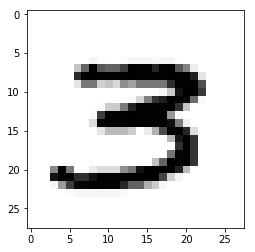

In [75]:
plt.imshow(sample,cmap='Greys')

In [76]:
learning_rate = 0.001
training_epochs = 15
batch_size = 100

In [147]:
n_classes = 10
n_samples = mnist.train.num_examples
n_samples

55000

In [79]:
n_input = 784

In [80]:
n_hidden_1 = 256
n_hidden_2 = 256

In [90]:
def multilayer_perceptron(x,weights,biases):
    """
    x: Placeholder for Data Input
    weights: Dict of weights
    biases: dict of bias values
    """
    # First Hidden Layer with RELU Activation
    # X * W + B
    layer_1 = tf.add(tf.matmul(x,weights['h1']),biases['b1'])
    # Func(X * W + B) where Func = RELU -> max(0,x)
    layer_1 = tf.nn.relu(layer_1)
    
    #Second Hidden Layer
    layer_2 = tf.add(tf.matmul(layer_1,weights['h2']),biases['b2'])
    layer_2 = tf.nn.relu(layer_2)
    
    #Last Output Layer
    out_layer = tf.matmul(layer_2, weights['out']) + biases['out']
    
    return out_layer

In [91]:
weights = {
    'h1':tf.Variable(tf.random_normal([n_input,n_hidden_1])),
    'h2':tf.Variable(tf.random_normal([n_hidden_1,n_hidden_2])),
    'out':tf.Variable(tf.random_normal([n_hidden_2,n_classes]))
}

In [92]:
biases = {
    'b1':tf.Variable(tf.random_normal([n_hidden_1])),
    'b2':tf.Variable(tf.random_normal([n_hidden_2])),
    'out':tf.Variable(tf.random_normal([n_classes]))
}

In [98]:
# None means it can be of any size
x = tf.placeholder('float',[None,n_input])

In [99]:
y = tf.placeholder('float',[None,n_classes])

In [100]:
pred = multilayer_perceptron(x,weights,biases)

In [104]:
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=pred,labels=y))

In [105]:
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

In [117]:
## Training

In [118]:
t = mnist.train.next_batch(1)

In [135]:
# y outputs the actual labels
# x inputs the 784 bytes
Xsamp,ysamp = t

In [120]:
## Run the Session

In [121]:
sess = tf.InteractiveSession()

In [122]:
init = tf.initialize_all_variables()

Instructions for updating:
Use `tf.global_variables_initializer` instead.


In [123]:
sess.run(init)

In [124]:
# 15 loops
for epoch in range(training_epochs):
    # Cost
    avg_cost = 0.0
    total_batch = int(n_samples/batch_size)
    for i in range(total_batch):
        batch_x,batch_y = mnist.train.next_batch(batch_size)
        _,c = sess.run([optimizer,cost],feed_dict={x:batch_x,y:batch_y})
        avg_cost += c/total_batch
    print('Epoch: {}  cost{:.4f}'.format(epoch+1,avg_cost))
print('Model has completed {} Epochs of training'.format(training_epochs))

Epoch: 1  cost143.5352
Epoch: 2  cost36.4594
Epoch: 3  cost23.0789
Epoch: 4  cost16.0012
Epoch: 5  cost11.5376
Epoch: 6  cost8.6784
Epoch: 7  cost6.4908
Epoch: 8  cost4.8825
Epoch: 9  cost3.7110
Epoch: 10  cost2.7585
Epoch: 11  cost2.0914
Epoch: 12  cost1.5811
Epoch: 13  cost1.1572
Epoch: 14  cost0.8874
Epoch: 15  cost0.8145
Model has completed 15 Epochs of training


In [136]:
## Model Evaluation

In [137]:
correct_predictions = tf.equal(tf.argmax(pred,1),tf.argmax(y,1))

In [138]:
print(correct_predictions[0])

Tensor("strided_slice:0", shape=(), dtype=bool)


In [139]:
correct_predictions = tf.cast(correct_predictions,'float')

In [140]:
print(correct_predictions[0])

Tensor("strided_slice_1:0", shape=(), dtype=float32)


In [141]:
accuracy = tf.reduce_mean(correct_predictions)

In [142]:
type(accuracy)

tensorflow.python.framework.ops.Tensor

In [143]:
mnist.test.labels

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [145]:
#mnist.test.images[0]

In [146]:
accuracy.eval({x:mnist.test.images,y:mnist.test.labels})

0.9482

In [148]:
## TensorFlow iwth Contrib.Learn

In [149]:
from sklearn.datasets import load_iris

In [150]:
iris = load_iris()

In [151]:
iris.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])

In [152]:
X = iris['data']
y = iris['target']

In [153]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [154]:
y.dtype

dtype('int64')

In [155]:
from sklearn.cross_validation import train_test_split

In [156]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [171]:
import tensorflow.contrib.learn as learn

In [174]:
# Specify that all features have real-value data
feature_columns = [tf.contrib.layers.real_valued_column("", dimension=4)]
 
# Build 3 layer DNN with 10, 20, 10 units respectively.
classifier = tf.contrib.learn.DNNClassifier(feature_columns=feature_columns,
                                            hidden_units=[10, 20, 10],
                                            n_classes=3,
                                            model_dir="./output")
 

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x10f7b5e48>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1.0
}
, '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_save_checkpoints_steps': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_model_dir': None}


In [175]:
classifier.fit(X_train,y_train,steps=200,batch_size=32)

Instructions for updating:
Estimator is decoupled from Scikit Learn interface by moving into
separate class SKCompat. Arguments x, y and batch_size are only
available in the SKCompat class, Estimator will only accept input_fn.
Example conversion:
  est = Estimator(...) -> est = SKCompat(Estimator(...))
Instructions for updating:
Estimator is decoupled from Scikit Learn interface by moving into
separate class SKCompat. Arguments x, y and batch_size are only
available in the SKCompat class, Estimator will only accept input_fn.
Example conversion:
  est = Estimator(...) -> est = SKCompat(Estimator(...))
Instructions for updating:
Estimator is decoupled from Scikit Learn interface by moving into
separate class SKCompat. Arguments x, y and batch_size are only
available in the SKCompat class, Estimator will only accept input_fn.
Example conversion:
  est = Estimator(...) -> est = SKCompat(Estimator(...))
Instructions for updating:
Please switch to tf.summary.scalar. Note that tf.summary.scal

DNNClassifier(params={'head': <tensorflow.contrib.learn.python.learn.estimators.head._MultiClassHead object at 0x10f7b5748>, 'hidden_units': [10, 20, 10], 'feature_columns': (_RealValuedColumn(column_name='', dimension=4, default_value=None, dtype=tf.float32, normalizer=None),), 'optimizer': None, 'activation_fn': <function relu at 0x10f514b70>, 'dropout': None, 'gradient_clip_norm': None, 'embedding_lr_multipliers': None, 'input_layer_min_slice_size': None})

In [176]:
iris_predictions = classifier.predict(X_test)

Instructions for updating:
Please switch to predict_classes, or set `outputs` argument.
Instructions for updating:
Estimator is decoupled from Scikit Learn interface by moving into
separate class SKCompat. Arguments x, y and batch_size are only
available in the SKCompat class, Estimator will only accept input_fn.
Example conversion:
  est = Estimator(...) -> est = SKCompat(Estimator(...))
INFO:tensorflow:Restoring parameters from ./output/model.ckpt-200


In [183]:
iris_predictions = list(classifier.predict(X_test))

Instructions for updating:
Please switch to predict_classes, or set `outputs` argument.
Instructions for updating:
Estimator is decoupled from Scikit Learn interface by moving into
separate class SKCompat. Arguments x, y and batch_size are only
available in the SKCompat class, Estimator will only accept input_fn.
Example conversion:
  est = Estimator(...) -> est = SKCompat(Estimator(...))
INFO:tensorflow:Restoring parameters from ./output/model.ckpt-200


In [184]:
from sklearn.metrics import classification_report, confusion_matrix

In [185]:
print(classification_report(y_test,list(iris_predictions)))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        19
          1       0.76      1.00      0.87        13
          2       1.00      0.69      0.82        13

avg / total       0.93      0.91      0.91        45

